# **import library**

In [1]:
import pandas as pd

# **Read dataset**

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Remove missing values**

In [11]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# **Data visualization**

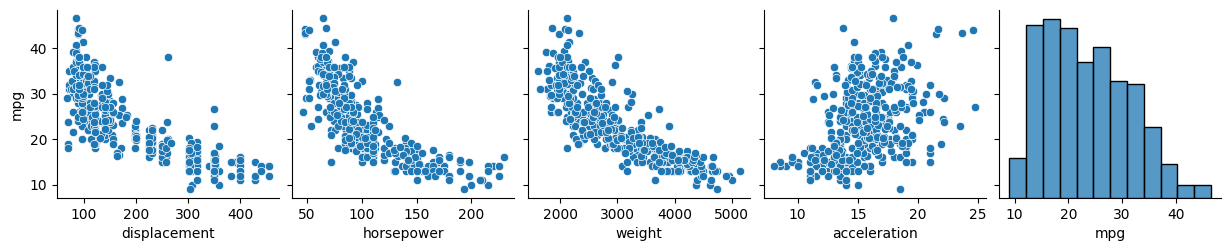

In [12]:
import seaborn as sns
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'], y_vars='mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

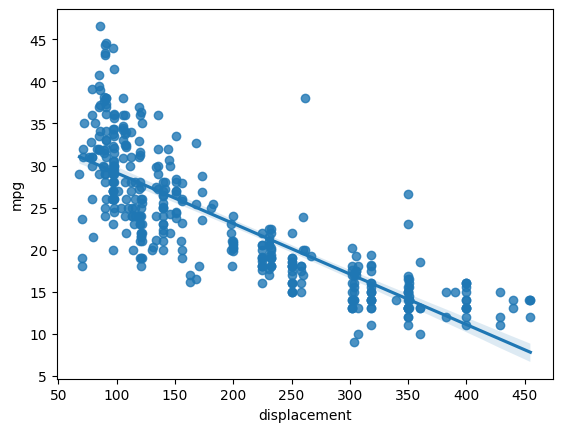

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# **Define target variables**
y (output)
x (input)

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]

# **Scaling data**

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
X = ss.fit_transform(X)

In [19]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

# **Split dataset**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1929)

In [22]:
df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 9), (274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
model.intercept_

23.482662112274785

In [30]:
model.coef_

array([-0.36496176, -1.67848535, -4.8179326 , -0.17522789])

# **Predict Data**

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([11.62693265, 27.28758518, 30.3514637 , 17.09273045, 14.91709594,
       24.24548306, 20.70426948, 17.34695201, 26.87793782, 29.54283341,
       12.0962673 , 26.04755745, 31.15417297, 15.59272382, 24.84088295,
       26.84312447, 29.44352035,  6.39096878, 29.01791186, 31.13780646,
       29.00408508, 29.13988846, 26.83012596, 13.64674909, 13.84830147,
       24.84006576, 27.82151112, 14.43913541, 27.65419691, 31.02768452,
       26.69627931, 30.19755643, 19.14607946, 16.99044362, 27.41211028,
       29.850151  , 27.36485839, 23.35460262, 27.64191533, 28.5553871 ,
       31.57202304, 28.71119937, 21.78921801, 25.81844862, 15.26270578,
        7.62917217, 25.54073179, 23.87849636, 27.47242214, 29.29617485,
       19.21465645, 22.39648774, 29.39366046, 28.18893298, 16.39504081,
       11.01063726, 21.38532584, 25.2334603 , 26.34749003, 25.65951302,
       26.00467738, 24.03521705, 22.16778549, 24.80192431, 27.47563009,
       26.212307  , 20.70984241, 21.89696988, 20.61270482, 24.65

# **Model Accuracy**

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.14304319767430418

# **Polynomial Regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [43]:
X_train2 = poly.fit_transform(X_train)

In [44]:
X_test2 = poly.fit_transform(X_test)

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.intercept_

21.50381929429424

In [47]:
model.coef_

array([-1.44216054, -4.73733728, -2.5213942 , -0.77078559,  0.91196007,
        0.04376435, -0.7098929 ,  1.41282065, -0.0995476 ,  1.41849053])

In [48]:
y_pred_poly = model.predict(X_test)

# **Model Accuracy**

In [49]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12036844215483031

# **Accuracy Both Model**
**Linear Regression :**  86%

---


**Polynomial Regression :** 88%